![Banner logo](https://raw.githubusercontent.com/CitrineInformatics/community-tools/master/templates/fig/citrine_banner_2.png "Banner logo")

## Visualization in Python

*Authors: Zach del Rosario (zdelrosario@citrine.io)*

The purpose of this exercise is to introduce both `matplotlib` functionality and some basics of visualizing data. As a result of completing this notebook, you should be able to:
* Re-create a number of different plots using `matplotlib`
* Draw conclusions about data using histograms, boxplots, and scatterplots

Tips:
* *Google is your friend*: If you don't know how to do something and can't find it in the examples, *first* try searching for something related on the web. If you can't find it after 5 minutes of searching on your own, then try asking a question. Learning how to search for your own answers is a valuable skill, and you are *expected* to have to look stuff up in this exercise.
* Not all the code here will make sense if you're new to python. That's ok! I've tried to scaffold the exercises to focus on `matplotlib` syntax, rather than more general python syntax.

In [4]:
# Setup
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
# For jupyter-matplotlib compatibility
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# External filename handling
dir_incl = "incl/"
assignment_prefix = "03_" # This assignment's number-prefix
filename_alloy_data = "../../data/wiki_comp.csv"

# Load data
df_data = pd.read_csv(filename_alloy_data)
# Extract the series number
df_data = df_data.assign(
    series = list(map(lambda s: s.replace("V-", "")[0], df_data.alloy))
)

When studying a new dataset, it's always a good idea to do some simple 'first checks'

In [5]:
# Check the data's shape
df_data.shape

(137, 28)

We have 137 observations on 28 variables. Because there are so many variables, these data will be difficult to visualize!

In [6]:
# Glimpse the data
df_data.head()

,alloy,al_percent,Ag,B,Be,Bi,Ca,Cd,Ce,Cr,...,O,Pb,Sc,Si,Ti,V,Y,Zn,Zr,series
0,1100,99.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1
1,1230,90.8500,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.00,0.30,0.15,0.0,0.0,0.1,0.0,1
2,1420,92.9000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.1,1
3,1421,92.9000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.20,0.00,0.00,0.0,0.0,0.0,0.1,1
4,1424,91.4885,0.0,0.0,0.2,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.08,0.08,0.00,0.0,0.0,0.7,0.1,1


This is a dataset about Aluminum alloys, scraped from [Wikipedia](https://en.wikipedia.org/wiki/Aluminium_alloy#Wrought_alloys). The `alloy` column identifies the specific alloy, `al_percent` gives the percent Aluminum content (by weight), `series` gives the alloy series number (defining "families" of alloys), and the remaining columns give other alloying elements. From the "head" of the data (the first few observations) we can see the alloying elements are *sparse* -- many of the entries are zero.

### Learning `matplotlib` syntax by doing

__Q1: Reproduce This Plot__
Use `matplotlib` to reproduce the following histogram. Make sure to learn how to change *all* of the following:
* Font sizes
* Number of histogram bins
* Axis limits
* Axis labels

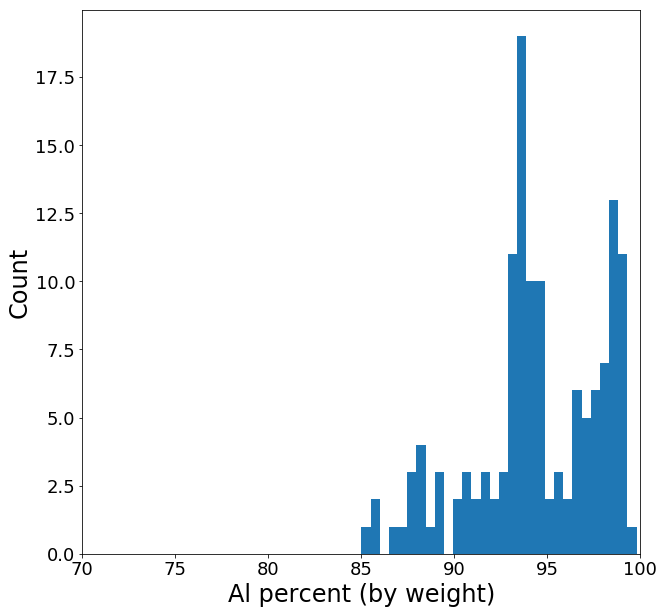

In [7]:
## Generate histogram
# solution-begin
# Plot size and default text
plt.figure(figsize = (10, 10))
font = {
    'size'   : 18
}
matplotlib.rc('font', **font)
# Plot data
plt.hist(
    df_data["al_percent"],
    bins = 30
)
# Annotations and limits
plt.xlabel("Al percent (by weight)", size = 24)
plt.ylabel("Count", size = 24)
plt.xlim((70, 100))
# Save for solution
plt.savefig(dir_incl + assignment_prefix + "q1_target.png")
# solution-end

<!-- task-begin -->
<img src="./incl/03_q1_target.png">
<!-- task-end -->

__Q2: What does this histogram tell you?__
List _at least 3_ observations conclusions about the data you can draw, based on the histogram above.
<!-- solution-begin -->
* All `Al` percentages are at or above 85%
* Many of the alloys tend to be around 93% `Al`, as evidenced by the tallest peak
* There is a second mode (peak) of alloys around 97-98% `Al`
* There is a fairly long left tail of alloys spread between 85% and 92% `Al`
<!-- solution-end -->

Next, we'll study how alloy composition varies across the various Al series.

In [8]:
series = [str(i) for i in range(1, 9)]
mean_percentages = [np.mean(df_data[df_data.series == s]["al_percent"]) for s in series] # List comprehension
print("Series, Mean Percent")
for ind in range(len(series)):
    print("     {0:},   {1:2.1f}".format(series[ind], mean_percentages[ind]))

Series, Mean Percent
     1,   93.3
     2,   93.6
     3,   98.6
     4,   92.9
     5,   96.2
     6,   97.9
     7,   90.1
     8,   94.8


This shows that Series 3 and 6 have the highest `Al` content, on average. However, we can use *boxplots* to gain a fair bit more insight into the data.

__Q3: Reproduce This Plot__
Use `matplotlib` to reproduce the following [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

Hints:
* You may re-use lessons you learned from Q1
* plt.boxplot() can take a list of different data sets to produce multiple boxplots on the same figure. You can use a *list comprehension* like in `mean_percentages` above to create such a list, and pass it to plt.boxplot()

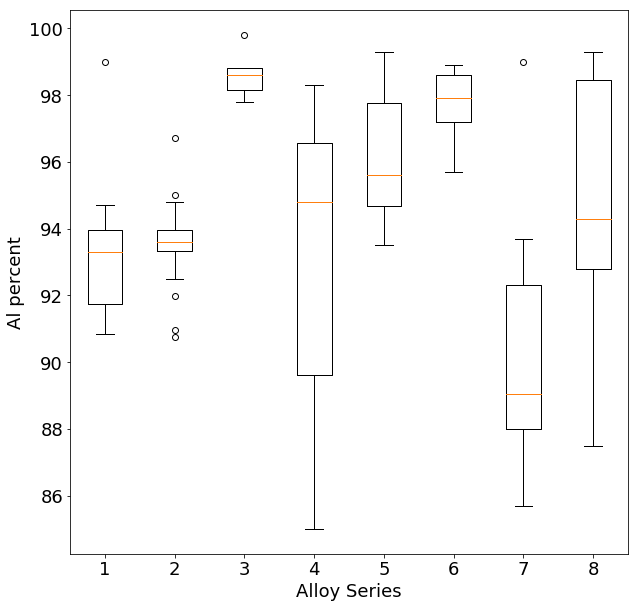

In [9]:
## Generate boxplot
# solution-begin
# Plot size and default text
plt.figure(figsize = (10, 10))
font = {
    'size'   : 18
}
matplotlib.rc('font', **font)
# Plot data
plt.boxplot(
    [df_data[df_data.series == s]["al_percent"] for s in series]
)
# Annotate
plt.xlabel("Alloy Series")
plt.ylabel("Al percent")
# Save for inclusion
plt.savefig(dir_incl + assignment_prefix + "q3_target.png")
# solution-end

<!-- task-begin -->
<img src="./incl/03_q3_target.png">
<!-- task-end -->

__Q4: What does this plot tell you?__
List _at least 3_ observations conclusions about the data you can draw, based on the boxplots above.
<!-- solution-begin -->
* Series 3 and 6 are indeed the most pure in `Al`, though some instances of Series 5 have higher `Al` content
* Series 4 and 8 are highly variable in `Al` content
* Series 2 has a (relatively) large number of outliers (shown as dots)
<!-- solution-end -->

Studying *all* the variables at once is difficult, as we cannot directly visualize 26-dimensional space! Instead, we will use [t-SNE](https://lvdmaaten.github.io/tsne/) to *reduce dimensionality* while preserving low-dimensional structure, in this case clusters of data.

In [1]:
X_series = df_data["series"]
## Reduce dimensionality
X_orig = df_data.drop(["alloy", "al_percent", "series"], axis = 1).values
# np.random.seed(101) # t-SNE is a random algorithm; set seed for reproducibility
X_tsne = TSNE(
    n_components = 2
).fit_transform(X_orig)

print(X_orig.shape)
print(X_tsne.shape)

NameError: name 'df_data' is not defined

We can see the modified data `X_tsne` has just two variables, but the same number of observations as `X_orig`. We can use these two coordinates to plot the data and look for patterns.

__Q5: Reproduce This Plot__
Use `matplotlib` to reproduce the following scatterplot on the two t-SNE coordinates in `X_tsne`.

Hints:
* You may re-use lessons you learned from Q1 and Q2
* You will need to introduce a colormap to mark the alloys from different series. [This tutorial](https://gist.github.com/jakevdp/8a992f606899ac24b711) may be helpful
* I use the colormap `viridis` below; it is a [perceptually uniform](http://bids.github.io/colormap/) colorscale that avoids introducing erroneous patterns in visualizations

<!-- task-begin -->
<img src="./incl/03_q5_target.png">
<!-- task-end -->

__Q6: What does this plot tell you?__
List _at least 3_ observations conclusions about the data you can draw, based on the t-SNE scatterplot above.
<!-- solution-begin -->
* The compositional clusters do not perfectly align with the alloy Series
* There is a cluster of 7000 Series alloys that are more similar to each other, than to other alloys
* All 6000 Series alloys cluster together, though they also cluster with other alloys from different series
<!-- solution-end -->

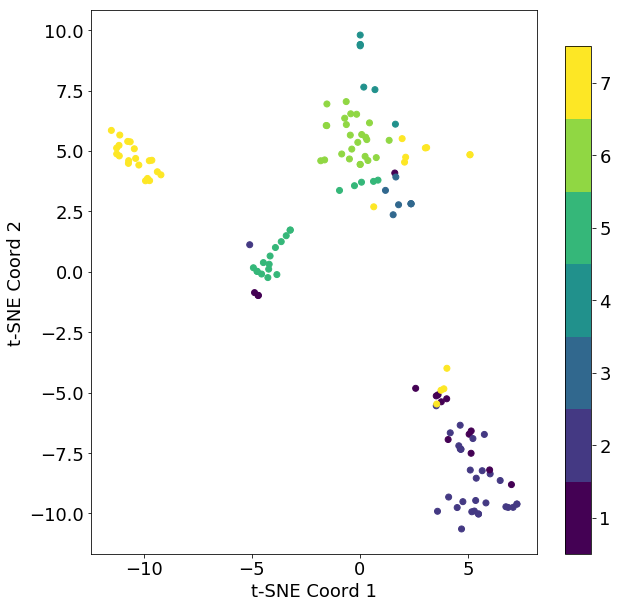

In [11]:
## Generate scatterplot
# solution-begin
# Format for color names
# Plot size and default text
plt.figure(figsize = (10, 10))
font = {
    'size'   : 18
}
matplotlib.rc('font', **font)
# Plot data
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c = X_series,
    cmap = plt.cm.get_cmap('viridis', 7)
)
# Annotate
plt.xlabel("t-SNE Coord 1")
plt.ylabel("t-SNE Coord 2")
plt.colorbar(ticks = range(len(series)))
plt.clim(0.5, 7.5) # Center
# Save for inclusion
plt.savefig(dir_incl + assignment_prefix + "q5_target.png")
# solution-end